<a href="https://colab.research.google.com/github/Garima0186/Data-Science-Methodologies/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Prediction using Machine Learning in Python (SVM Classifier)**

1. Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression.
2. It finds the best decision boundary (called a hyperplane) that separates different classes in the data.
3. SVM aims to maximize the margin between the closest data points of each class, called support vectors.
4. It can handle both linear and non-linear data using techniques like the kernel trick.
5. SVM is powerful for high-dimensional data and binary classification tasks like spam detection or disease prediction.


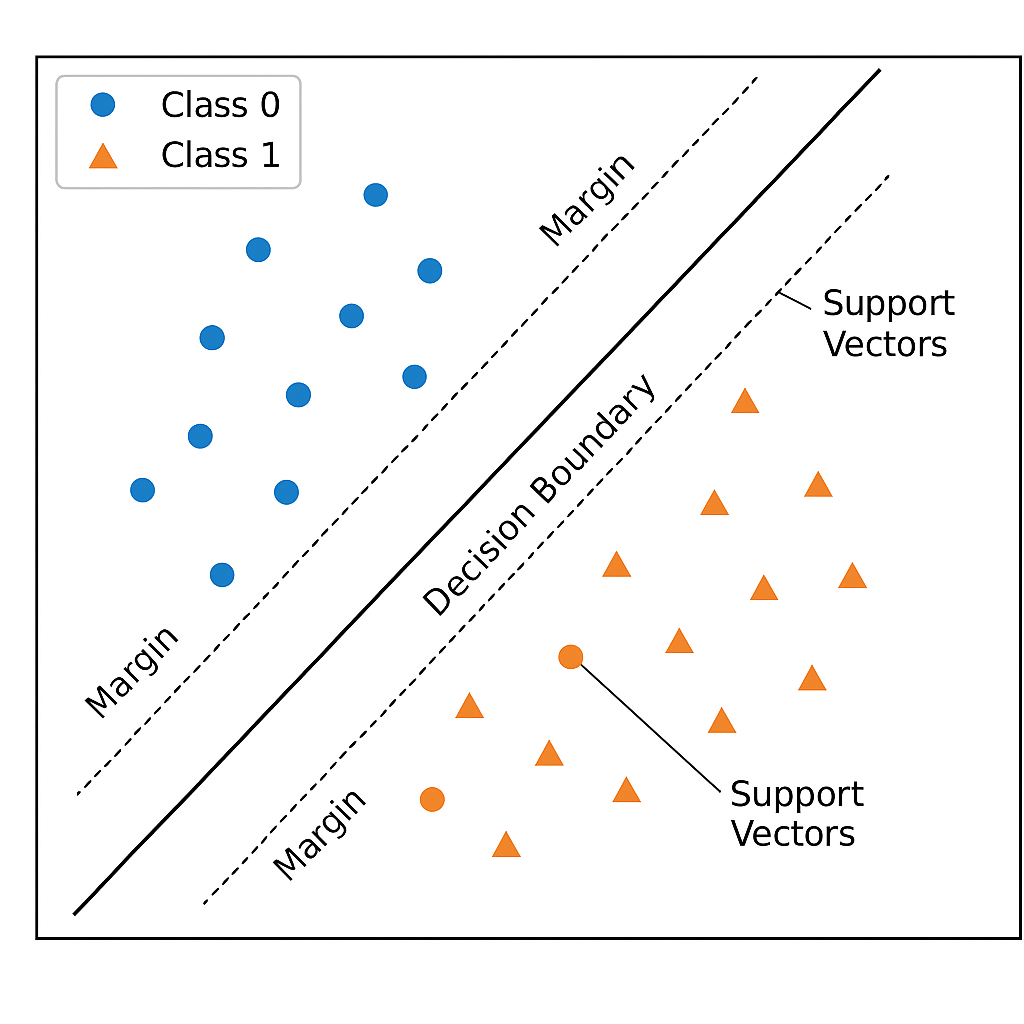

**Step-1: Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Step-2 : Load the dataset**

In [2]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

**Step-3 : Explore the Dataset**

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


**Step 4 : Analyse Grouped Data**

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Step 5 : Splitting Features and Labels**

In [8]:
x= diabetes_dataset.drop(columns='Outcome',axis=1)
y= diabetes_dataset['Outcome']

In [9]:
print(x)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Step 6 : Data Standardization**

In [11]:
scaler = StandardScaler()
scaler.fit(x)
standard_data = scaler.transform(x)
x= standard_data

In [12]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


**Step-7 : Train-Test Split**

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size= 0.2, stratify= y,random_state = 2)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


**Step-8 :Train the model**

In [15]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

**Step-9: Evaluate the model**

In [16]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [17]:
print('Accuracy score :', training_data_accuracy)
print('Accuracy score :', testing_data_accuracy)

Accuracy score : 0.7866449511400652
Accuracy score : 0.7727272727272727


**Step-10 : Predictive System**

In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_np = np.asarray(input_data)

input_data_reshaped = input_data_np.reshape(1, -1)
print(input_data_reshaped)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic
